In [65]:
"""
| num |
| --- |
| 8   |
| 8   |
| 3   |
| 3   |
| 1   |
| 4   |
| 5   |
| 6   |
"""

import pandas as pd

data = {"num": [8, 8, 3, 3, 1, 4, 5, 6]}

df = pd.DataFrame(data)

df["num"].value_counts()

num
8    2
3    2
1    1
4    1
5    1
6    1
Name: count, dtype: int64

8.0 11.999999999999984


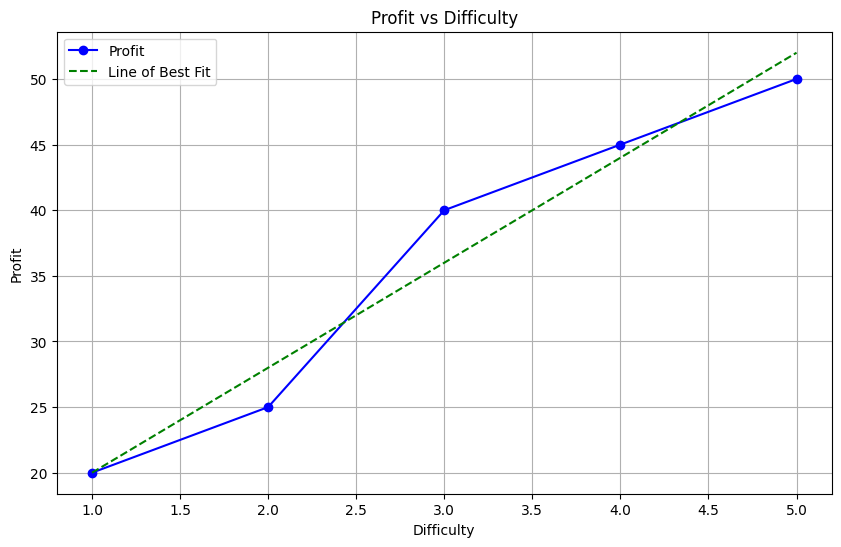

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot
plt.figure(figsize=(10, 6))
difficulty = [1, 2, 3, 4, 5]
profit = [20, 25, 40, 45, 50]

# Make a line plot
plt.plot(difficulty, profit, label="Profit", color="blue", marker="o")

# Add a line of best fit
m, b = np.polyfit(difficulty, profit, 1)
print(m, b)
plt.plot(
    difficulty,
    [m * x + b for x in difficulty],
    color="green",
    label="Line of Best Fit",
    linestyle="--",
)

# Add titles and labels
plt.title("Profit vs Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
"""
| num |
| --- |
| 8   |
| 8   |
| 3   |
| 3   |
| 1   |
| 4   |
| 5   |
| 6   |
"""